<a href="https://colab.research.google.com/github/naveencgr/TensorFlow/blob/main/Check_Sarcastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
#constants
tokenizer_no_of_words = 10000
training_data_len = 20000
tokenizer_oov_token ="<OOV>"
pad_seq_truncate = "post"
pad_seq_padding = "post"
pad_max_length = 40
embedding_dim = 16



In [4]:
!wget https://storage.googleapis.com/learning-datasets/sarcasm.json -O /tmp/sarcasm.json

--2025-03-29 16:41:42--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.207, 108.177.119.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  7.11MB/s    in 0.8s    

2025-03-29 16:41:44 (7.11 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [20]:
from os import truncate
with open('/tmp/sarcasm.json', 'r') as f:
  data = json.load(f)

headlines_data = []
sarcastic_data = []

for item in data:
  headlines_data.append(item['headline'])
  sarcastic_data.append(item['is_sarcastic'])


In [23]:
training_data = headlines_data[ : training_data_len]
testing_data = headlines_data [training_data_len: ]

training_labes = sarcastic_data[ : training_data_len]
testing_labes = sarcastic_data[ training_data_len: ]

In [32]:
tokenizer = Tokenizer(num_words= tokenizer_no_of_words, oov_token= tokenizer_oov_token )
tokenizer.fit_on_texts(training_data)

training_sequences = tokenizer.texts_to_sequences(training_data)
training_pad_seq = pad_sequences(sequences= training_sequences, truncating= pad_seq_truncate, padding = pad_seq_padding, maxlen = pad_max_length)

testing_sequences = tokenizer.texts_to_sequences(testing_data)
testing_pad_seq = pad_sequences(sequences= testing_sequences, truncating= pad_seq_truncate, padding = pad_seq_padding, maxlen = pad_max_length)


In [33]:
import numpy as np

np_training_data = np.array(training_pad_seq)
np_training_labels = np.array(training_labes)

np_testing_data = np.array(testing_pad_seq)
np_testing_labels = np.array(testing_labes)



In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_no_of_words, embedding_dim, input_length=pad_max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
num_epochs = 30
history = model.fit(np_training_data, np_training_labels, epochs=num_epochs, validation_data=(np_testing_data, np_testing_labels), verbose=2)

Epoch 1/30
625/625 - 6s - 10ms/step - accuracy: 0.6554 - loss: 0.6073 - val_accuracy: 0.7843 - val_loss: 0.4680
Epoch 2/30
625/625 - 3s - 5ms/step - accuracy: 0.8447 - loss: 0.3719 - val_accuracy: 0.8228 - val_loss: 0.3866
Epoch 3/30
625/625 - 5s - 8ms/step - accuracy: 0.8842 - loss: 0.2867 - val_accuracy: 0.8495 - val_loss: 0.3497
Epoch 4/30
625/625 - 4s - 6ms/step - accuracy: 0.9067 - loss: 0.2383 - val_accuracy: 0.8580 - val_loss: 0.3439
Epoch 5/30
625/625 - 4s - 7ms/step - accuracy: 0.9206 - loss: 0.2033 - val_accuracy: 0.8547 - val_loss: 0.3538
Epoch 6/30
625/625 - 5s - 9ms/step - accuracy: 0.9299 - loss: 0.1809 - val_accuracy: 0.8465 - val_loss: 0.3848
Epoch 7/30
625/625 - 4s - 7ms/step - accuracy: 0.9410 - loss: 0.1563 - val_accuracy: 0.8496 - val_loss: 0.3897
Epoch 8/30
625/625 - 4s - 6ms/step - accuracy: 0.9482 - loss: 0.1418 - val_accuracy: 0.8468 - val_loss: 0.4144
Epoch 9/30
625/625 - 3s - 5ms/step - accuracy: 0.9528 - loss: 0.1288 - val_accuracy: 0.8272 - val_loss: 0.4889


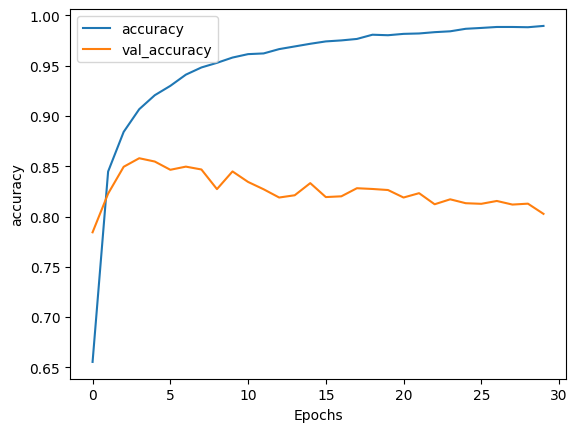

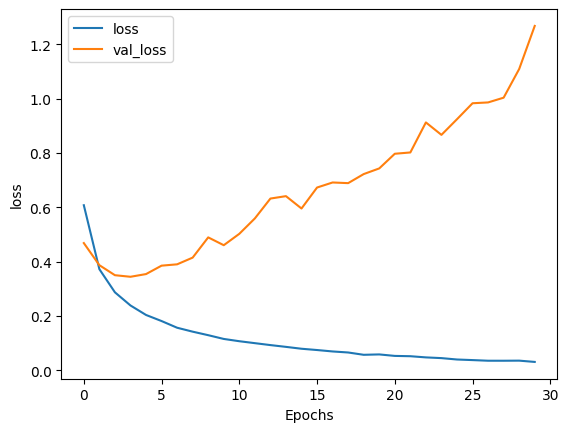

In [40]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [41]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=pad_max_length, padding=pad_seq_padding, truncating=pad_seq_truncate)
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[8.4859751e-02]
 [2.1023743e-06]]
